In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

#scaling and train-test split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_val_predict, learning_curve

#models to review
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest

#crossvalidation methods

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV

#metrics to review
from sklearn.metrics import (make_scorer, recall_score, precision_score,
f1_score, roc_auc_score, accuracy_score, precision_recall_curve, average_precision_score,
                             auc, roc_curve, classification_report, confusion_matrix)

#dealing with SMOTE techniques
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split, RandomizedSearchCV

#import helper file py
import nbimporter
from dataclean import *

#autoreload python file
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
#neatness
%matplotlib inline

import datetime
import itertools

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#import csv data 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data cleaning and inital EDA

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#df.info()

In [6]:
#reorder columns
column_names = ['Class', 'Amount','Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

df = df.reindex(columns=column_names)
df.columns

Index(['Class', 'Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')

In [7]:
# number of fraud cases to equalize subsample proportions
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#assess Target column's balance
n = "\n"
normal_percent = df['Class'].value_counts()[0] / len(df)
fraud_percent = df['Class'].value_counts()[1] / len(df)
print(f"Percentage of instances of normal transactions: \
{normal_percent}\n{n}Percentages of instances of fraud transactions: {fraud_percent}")

Percentage of instances of normal transactions: 0.9982725143693799

Percentages of instances of fraud transactions: 0.001727485630620034


In [9]:
#scale the last two columns that need to be modified
std_scaler = StandardScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
#create under-sampled dataframe balanced
df = df.sample(frac=1)

fraud_under = df[df['Class'] == 1]
nonfraud_under = df[df['Class'] == 0][:492]

df_under = pd.concat([fraud_under, nonfraud_under])

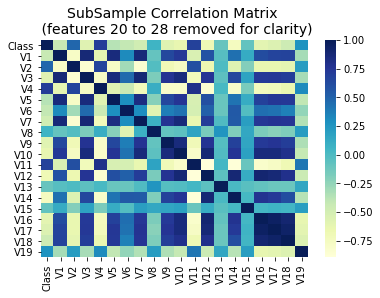

In [11]:
#correlation heatmap on subsample
df_corr = df_under.iloc[:,:20]
under_corr = df_corr.corr()

sns.heatmap(under_corr, cmap='YlGnBu')
plt.title('SubSample Correlation Matrix \n (features 20 to 28 removed for clarity)', fontsize=14);
# plt.savefig('subsample_heatmap')

In [13]:
#prep matricies of features for plotting

feature_v14 = df_under['V14'].loc[df_under['Class'] == 1].values
feature_v8 = df_under['V8'].loc[df_under['Class'] == 1].values
feature_v20 = df_under['V20'].loc[df_under['Class'] == 1].values

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence f

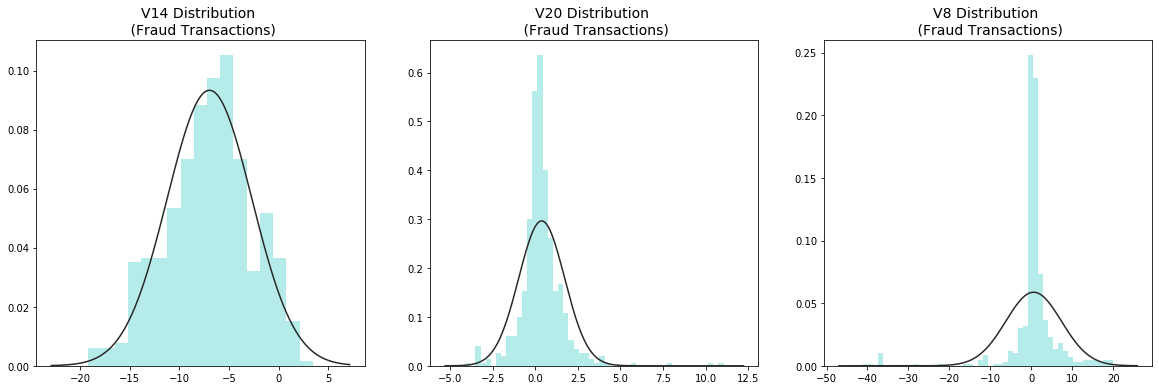

In [14]:
# distributions of specific features
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

sns.distplot(feature_v14, ax=ax1, fit= norm, kde=False, color='mediumturquoise')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(feature_v20, ax=ax2, fit= norm, kde=False, color='mediumturquoise')
ax2.set_title('V20 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(feature_v8, ax=ax3, fit= norm, kde=False, color='mediumturquoise')
ax3.set_title('V8 Distribution \n (Fraud Transactions)', fontsize=14);

In [15]:
df_under.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
150667,1,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,...,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,-0.041379,-0.020086
15539,1,-22.561699,13.208904,-24.643819,6.232532,-16.905611,-4.497439,-16.810184,14.955107,-3.871297,...,1.765987,-1.635517,-0.998317,0.138972,1.559350,-0.222125,1.504425,0.445920,0.046539,-1.429472
181966,1,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,...,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,-0.193306,0.639869
102446,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,-0.349231,-0.560285
223578,1,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,-2.828287,...,-0.648259,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,-0.317646,1.023923


## Initial training on under sampled data

### Train on the following:
+ Logisitic Regression
+ K Neighbors Classifier
+ Decision Trees Classifier
+ Random Forest Classifier
+ Gradient Boosting Classifier


### using cross validation 5 folds

In [16]:
#establish X values as feature matrix and y as target array
X = df_under.drop('Class', axis = 1).values
y = df_under['Class'].values

# test train split for undersampling. DO NOT EVER TOUCH TEST ITEMS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr_model = LogisticRegression().fit(X_train, y_train)

lr_train_score = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_train_score.mean()

0.9377804584085322

In [18]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

dt_train_score = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_train_score.mean()


0.9097782381020307

In [19]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

knn_train_score = cross_val_score(knn_model, X_train, y_train, cv=5)
knn_train_score.mean()

0.9276216258680179

In [20]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

rf_train_score = cross_val_score(rf_model, X_train, y_train, cv=5)
rf_train_score.mean()

0.9352083966451458

In [21]:
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

gb_train_score = cross_val_score(rf_model, X_train, y_train, cv=5)
gb_train_score.mean()

0.9237996597183891

### move this helper function to PY file

In [22]:
class_models = {'gbc': GradientBoostingClassifier(),'rf': RandomForestClassifier(),'knn': KNeighborsClassifier(),
                'dt': DecisionTreeClassifier(), 'lr': LogisticRegression()}

def cross_valid_score(class_models, X_train, y_train, cv=5):
    d = {}
    final = []
    for kind, model in class_models.items():
       
        model.fit(X_train, y_train)
        training_score = cross_val_score(model, X_train, y_train, cv=5)
        d[kind]= round(float(training_score.mean()),4)
    return d
    

In [23]:
cross_valid_score(class_models, X_train, y_train, cv=5)


{'gbc': 0.9403, 'rf': 0.934, 'knn': 0.9276, 'dt': 0.9148, 'lr': 0.9378}

### Let's try gridsearching for best parameters

In [24]:
#establish parameter dictionaries for GridSearch
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [7000]}

knn_params = {"n_neighbors": list(range(2,6,1)),
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

rf_params = {'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, None],
              'max_features': [1, 'sqrt', 'log2', None]}

dt_params = {'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, None],
              'max_features': [1, 'sqrt', 'log2', None]}

gbc_params = {'loss': ('deviance', 'exponential'), 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]}


#### KNN evaluation undersample gridsearch

In [25]:
#KNN scores gridsearch analysis on test data
gridsear_knn = GridSearchCV(KNeighborsClassifier(), knn_params)

gridsear_knn.fit(X_train, y_train)
# best parameters to be used
gridsear_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [26]:


knn_best = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_train)

knn_recall = recall_score(y_train, y_pred_knn)
knn_precision = precision_score(y_train, y_pred_knn)
knn_f1 = f1_score(y_train, y_pred_knn)
knn_accuracy = accuracy_score(y_train, y_pred_knn)
print(f'KNN recall score: {knn_recall}\nKNN precision score: {knn_precision} \
    \nKNN f1 score: {knn_f1}\nKNN accuracy score: {knn_accuracy}')



KNN recall score: 0.9185750636132316
KNN precision score: 0.978319783197832     
KNN f1 score: 0.9475065616797901
KNN accuracy score: 0.9491740787801779


#### LogisticRegression evaluation undersample gridsearch

In [27]:
#LR scores gridsearch analysis on test data
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(X_train, y_train)
# best parameters to be used
gridsear_lr.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=7000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
#LR scores gridsearch analysis on test data
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(X_train, y_train)
# best parameters to be used
gridsear_lr.best_estimator_
lr_best = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=7000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_train)

lr_recall = recall_score(y_train, y_pred_lr)
lr_precision = precision_score(y_train, y_pred_lr)
lr_f1 = f1_score(y_train, y_pred_lr)
lr_accuracy = accuracy_score(y_train, y_pred_lr)
print(f'LogisticRegression recall score: {lr_recall}\nLogisticRegression  precision score: {lr_precision} \
    \nLogisticRegression  f1 score: {lr_f1}\nLogisticRegression  accuracy score: {lr_accuracy}')

LogisticRegression recall score: 0.9236641221374046
LogisticRegression  precision score: 0.9864130434782609     
LogisticRegression  f1 score: 0.9540078843626807
LogisticRegression  accuracy score: 0.9555273189326556


#### DecisionTree evaluation undersample gridsearch

In [29]:
#DT scores gridsearch analysis on test data
gridsear_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)

gridsear_dt.fit(X_train, y_train)
# best parameters to be used
gridsear_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
#DT scores gridsearch analysis on test data
gridsear_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)

gridsear_dt.fit(X_train, y_train)
# best parameters to be used
gridsear_dt.best_estimator_
dt_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_train)

dt_recall = recall_score(y_train, y_pred_dt)
dt_precision = precision_score(y_train, y_pred_dt)
dt_f1 = f1_score(y_train, y_pred_dt)
dt_accuracy = accuracy_score(y_train, y_pred_dt)
print(f'DecisionTree recall score: {dt_recall}\nDecisionTree  precision score: {dt_precision} \
    \nDecisionTree  f1 score: {dt_f1}\nDecisionTree  accuracy score: {dt_accuracy}')

DecisionTree recall score: 0.8753180661577609
DecisionTree  precision score: 0.9856733524355301     
DecisionTree  f1 score: 0.9272237196765498
DecisionTree  accuracy score: 0.9313850063532402


#### RandomForest evaluation undersample gridsearch

In [31]:
#RF scores gridsearch analysis on test data
gridsear_rf = GridSearchCV(RandomForestClassifier(), rf_params)

gridsear_rf.fit(X_train, y_train)
# best parameters to be used
gridsear_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
#RF scores gridsearch analysis on test data
gridsear_rf = GridSearchCV(RandomForestClassifier(), rf_params)

gridsear_rf.fit(X_train, y_train)
# best parameters to be used
gridsear_rf.best_estimator_
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_train)

rf_recall = recall_score(y_train, y_pred_rf)
rf_precision = precision_score(y_train, y_pred_rf)
rf_f1 = f1_score(y_train, y_pred_rf)
rf_accuracy = accuracy_score(y_train, y_pred_rf)
print(f'RandomForest recall score: {rf_recall}\nRandomForest  precision score: {rf_precision} \
    \nRandomForest  f1 score: {rf_f1}\nRandomForest  accuracy score: {rf_accuracy}')

RandomForest recall score: 0.9847328244274809
RandomForest  precision score: 1.0     
RandomForest  f1 score: 0.9923076923076923
RandomForest  accuracy score: 0.9923761118170267


#### GradientBoosting evaluation undersample gridsearch

In [33]:
#GBC scores gridsearch analysis on test data
gridsear_gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)

gridsear_gbc.fit(X_train, y_train)
# best parameters to be used
gridsear_gbc.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [34]:
#GBC scores gridsearch analysis on test data
gridsear_gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)

gridsear_gbc.fit(X_train, y_train)
# best parameters to be used
gridsear_gbc.best_estimator_
gbc_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

gbc_best.fit(X_train, y_train)
y_pred_gbc = gbc_best.predict(X_train)

gbc_recall = recall_score(y_train, y_pred_gbc)
gbc_precision = precision_score(y_train, y_pred_gbc)
gbc_f1 = f1_score(y_train, y_pred_gbc)
gbc_accuracy = accuracy_score(y_train, y_pred_gbc)
print(f'GradientBoosting  recall score: {gbc_recall}\nGradientBoosting precision score: {gbc_precision} \
    \nGradientBoosting f1 score: {gbc_f1}\nGradientBoosting accuracy score: {gbc_accuracy}')

GradientBoosting  recall score: 1.0
GradientBoosting precision score: 0.9974619289340102     
GradientBoosting f1 score: 0.9987293519695045
GradientBoosting accuracy score: 0.9987293519695044


In [35]:
lr_yhat = cross_val_predict(lr_best, X_train, y_train, cv=5, method='predict_proba')

knn_yhat = cross_val_predict(knn_best, X_train, y_train, cv=5, method='predict_proba')

dt_yhat = cross_val_predict(dt_best, X_train, y_train, cv=5, method='predict_proba')

rf_yhat = cross_val_predict(rf_best, X_train, y_train, cv=5, method='predict_proba')

gbc_yhat = cross_val_predict(gbc_best, X_train, y_train, cv=5, method='predict_proba')


# lr_yhat = lr_best.predict(X_train)

# knn_yhat = knn_best.predict(X_train)

# dt_yhat = dt_best.predict(X_train)

# rf_yhat = rf_best.predict(X_train)

# gbc_yhat = gbc_best.predict(X_train)

In [36]:
lr_fpr, lr_tpr, lr_thresh = roc_curve(y_train, lr_yhat[:, 1])

knn_fpr, knn_tpr, knn_thresh = roc_curve(y_train, knn_yhat[:, 1])

dt_fpr, dt_tpr, dt_thresh = roc_curve(y_train, dt_yhat[:, 1])

rf_fpr, rf_tpr, rf_thresh = roc_curve(y_train, rf_yhat[:, 1])

gbc_fpr, gbc_tpr, gbc_thresh = roc_curve(y_train, gbc_yhat[:, 1])

In [37]:
# def roc_auc_score(y_train, y_hat):
    

# roc_auc_score(y_train, lr_yhat)
# roc_auc_score(y_train, knn_yhat)
# roc_auc_score(y_train, dt_yhat)

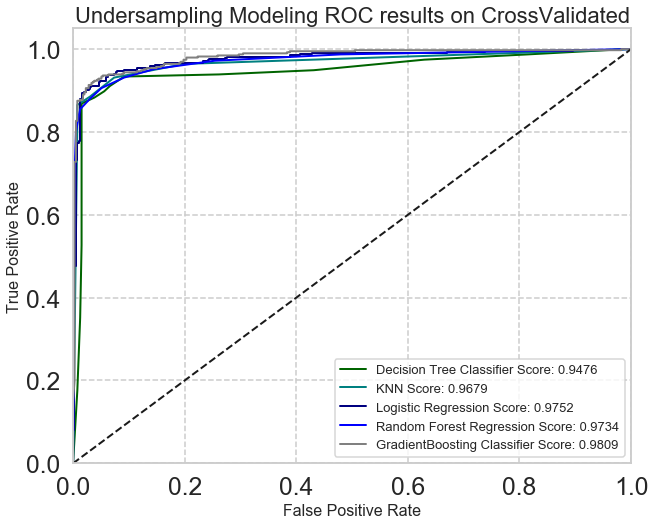

In [38]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.5,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


lw = 2
plt.figure(figsize=(10,8))
plt.plot(dt_fpr, dt_tpr, color = 'darkgreen', label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, dt_yhat[:, 1])))
plt.plot(knn_fpr, knn_tpr, color = 'teal', label='KNN Score: {:.4f}'.format(roc_auc_score(y_train, knn_yhat[:, 1])))
plt.plot(lr_fpr, lr_tpr, color = 'navy', label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_train, lr_yhat[:, 1])))
plt.plot(rf_fpr, rf_tpr, color = 'blue', label='Random Forest Regression Score: {:.4f}'.format(roc_auc_score(y_train, rf_yhat[:, 1])))
plt.plot(gbc_fpr, gbc_tpr, color = 'gray', label='GradientBoosting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gbc_yhat[:, 1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(prop={'size':13},loc='lower right')
plt.title('Undersampling Modeling ROC results on CrossValidated', fontsize=22)
plt.show()

# Done with undersampling - back to OG dataset

In [39]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [40]:


print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class'].values



No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [41]:
#Test train split standard 80 / 20
Xtrainfull, Xtestfull, ytrainfull, ytestfull = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11)

## BASELINE MODEL - LR Performing Badly

In [42]:
#LR scores gridsearch analysis on FULL 
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(Xtrainfull, ytrainfull)
# best parameters to be used
gridsear_lr.best_estimator_
gbc_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

lr_best.fit(Xtrainfull, ytrainfull)
y_pred_lr = lr_best.predict(Xtrainfull)

lr_recall = recall_score(ytrainfull, y_pred_lr)
lr_precision = precision_score(ytrainfull, y_pred_lr)
lr_f1 = f1_score(ytrainfull, y_pred_lr)
lr_accuracy = accuracy_score(ytrainfull, y_pred_lr)
print(f'GradientBoosting  recall score: {lr_recall}\nGradientBoosting precision score: {lr_precision} \
    \nGradientBoosting f1 score: {lr_f1}\nGradientBoosting accuracy score: {lr_accuracy}')

GradientBoosting  recall score: 0.6304909560723514
GradientBoosting precision score: 0.8905109489051095     
GradientBoosting f1 score: 0.7382753403933434
GradientBoosting accuracy score: 0.9992407118874673


# Isolation Forest on Original Dataset

In [43]:
df.head(3)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
282064,0,-0.695199,-0.614314,-1.916275,-1.730137,0.656040,-0.487710,3.070323,-0.568069,-0.476456,...,0.499473,0.694754,0.423320,0.039066,1.163410,1.081415,-0.314746,-0.042785,1.388017,1.596615
9491,0,1.150105,-0.155133,0.937371,0.207762,-0.800611,-0.244705,-0.662227,0.167198,1.659859,...,-0.267955,-0.641189,0.224193,0.147119,-0.206094,0.755057,-0.088940,-0.005766,-0.305292,-1.699961
127003,0,0.822446,-1.960303,-0.216410,-2.080111,-1.200551,0.278427,-0.582621,0.107804,0.461061,...,-0.198626,-0.536772,-0.330087,-0.815847,0.316892,0.057453,0.002637,0.048586,0.821088,-0.350401


In [44]:
X = df.drop('Class', axis=1)
y = df['Class']

In [45]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [46]:
#Test train split standard 80 / 20
og_Xtrain, og_Xtest, og_ytrain, og_ytest = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11)

## move this to helper function file

In [387]:
def plot_confusion_matrix(cm, title, classes=['anomaly', 'normal'],
                          cmap=plt.cm.Greens, save=False, saveas="MyFigure.png"):
    
    # print Confusion matrix with blue gradient colours
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    plt.figure(figsize = (7,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize= 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize = 14)

    plt.tight_layout()
    plt.ylabel('True label', fontsize= 16)
    plt.xlabel('Predicted label', fontsize= 16)
    
    if save:
        plt.savefig(saveas, dpi=100)

In [48]:
# Fit and train Isolation Forest on training data
# this is pretty standard parameters
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.05, n_estimators=100, n_jobs=-1)

start = datetime.datetime.now()
clfIF.fit(og_Xtrain,og_ytrain)
y_pred_train = clfIF.predict(og_Xtrain)
end = datetime.datetime.now()
print (end-start)

#fix the target class coing such that classification report works
y_pred_train[y_pred_train==1] = 0
y_pred_train[y_pred_train==-1] = 1

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0:00:36.165978


             precision    recall  f1-score   support

          0       1.00      0.98      0.99    227458
          1       0.07      0.78      0.12       387

avg / total       1.00      0.98      0.99    227845

AUC:  88.1%


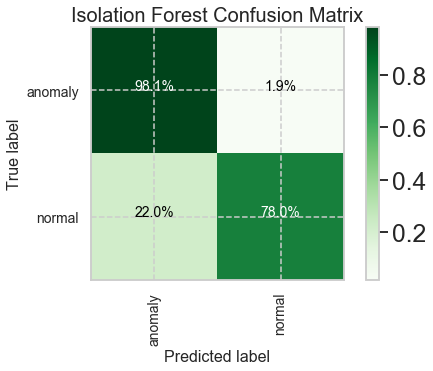

In [389]:

print(classification_report(og_ytrain, y_pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(og_ytrain, y_pred_train)))
cm = confusion_matrix(og_ytrain, y_pred_train)
plot_confusion_matrix(cm, title="Isolation Forest Confusion Matrix", save=False, saveas="IF_Confusion.png")

In [51]:
# this is now with lower contamination rate
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.02, n_estimators=100, n_jobs=-1)

start = datetime.datetime.now()
clfIF.fit(og_Xtrain,og_ytrain)
y_pred_train = clfIF.predict(og_Xtrain)
end = datetime.datetime.now()
print (end-start)

#fix the target class coing such that classification report works
y_pred_train[y_pred_train==1] = 0
y_pred_train[y_pred_train==-1] = 1

0:00:36.804944


             precision    recall  f1-score   support

          0       1.00      0.98      0.99    227458
          1       0.07      0.78      0.12       387

avg / total       1.00      0.98      0.99    227845

AUC:  88.1%


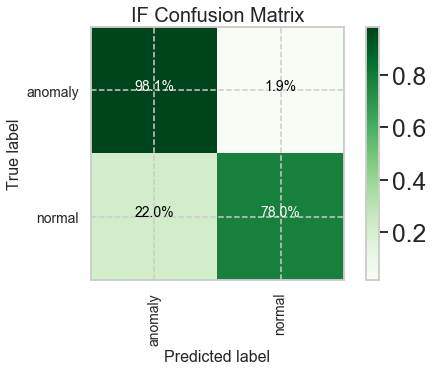

In [390]:
print(classification_report(og_ytrain, y_pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(og_ytrain, y_pred_train)))
cm = confusion_matrix(og_ytrain, y_pred_train)
plot_confusion_matrix(cm, title="IF Confusion Matrix", save=False, saveas="IF_CM.png")

In [53]:
(unique, counts) = np.unique(og_ytrain, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies 

array([[     0, 227458],
       [     1,    387]])

In [54]:
scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score, pos_label=1)}

In [55]:

## REVIST THIS TO SEE IF IT WORKS at 4:30pm
# gs_con = GridSearchCV(IsolationForest(random_state=11, max_samples=0.10, n_estimators=150, n_jobs=-1),
#                   param_grid={'contamination': np.arange(0.01, 0.25, 0.05)},
#                   scoring=scoring, refit='Recall')
# gs_con.fit(og_Xtrain, og_ytrain)
# results = gs_con.cv_results_

# PCA anomaly analysis -- UNSUPERVISED

### make a scree plot and review compoents and variance explained

In [56]:
from sklearn import (cluster, datasets, decomposition, ensemble, manifold,
                     random_projection, preprocessing)
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [57]:
#import csv data newly so any modifications are not transferred
df = pd.read_csv('creditcard.csv')


In [80]:
#create x and y, maintain in dataframe/ series format for the following
X_pca = df.copy().drop('Class', axis=1)
y_pca = df['Class'].copy()


#use Standard scaler to modify all of the feature columns in X
scaled_X = StandardScaler().fit_transform(X_pca)


In [81]:

pca = decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(scaled_X)

In [82]:
def scree_plot(ax, pca, n_components_to_plot=10, title=None):
 
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
                   (ind[i]+0.2, vals[i]+0.005), 
                   va="bottom", 
                   ha="center", 
                   fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

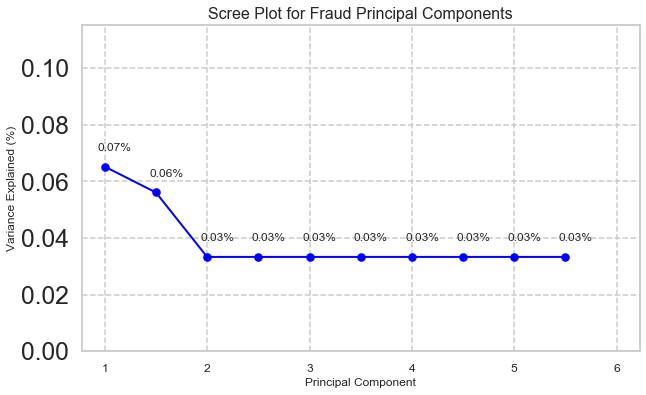

In [83]:
# interesting scree plot -- looks like it levels off after 2 principal components

fig, ax = plt.subplots(figsize=(10, 6))
scree_plot(ax, pca, title="Scree Plot for Fraud Principal Components")

In [272]:
#create x and y, maintain in dataframe/ series format for the following
X_pca = df.copy().drop('Class', axis=1)
y_pca = df['Class'].copy()


# featuresToScale = X_pca.columns
# sX = StandardScaler(copy=True)



# Need to scale the X features that are still in dataframe format
featuresToScale = X_pca.columns

#use Standard scaler to modify all of the feature columns in X
scaled_X = StandardScaler(copy=True)

# replace all of X_pca DataFrame features with the scaled features
# also fit label encoder and return encoded labels
# once you fit_transform to you X feature data -- pca object is ready to plot
X_pca.loc[:,featuresToScale] = scaled_X.fit_transform(X_pca[featuresToScale])

In [273]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_pca, y_pca, test_size=0.2, \
                    random_state=2018, stratify=y_pca)

In [274]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [275]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [276]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))


----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [277]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [278]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='darkgreen', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='darkgreen')

    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.xticks([0.0, 0.5, 1.0], fontsize=12)
    plt.yticks([0.0, 0.5, 1.05], fontsize=12)

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision), fontsize=16)

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks([0.0, 0.5, 1.0], fontsize=12)
    plt.yticks([0.0, 0.5, 1.05], fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic:\
    Area under the curve = {0:0.2f}'.format(areaUnderROC), fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

In [279]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", 
               palette="ch:2.5,-.2,dark=.3",data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName, fontsize=16)
    ax.set_yticklabels(ax.get_yticks(), size = 12)
    ax.set_ylabel(ax.get_ylabel(), size = 14)
    ax.set_xticklabels(ax.get_xticks(), size = 12)
    ax.set_xlabel(ax.get_xlabel(), size = 14)


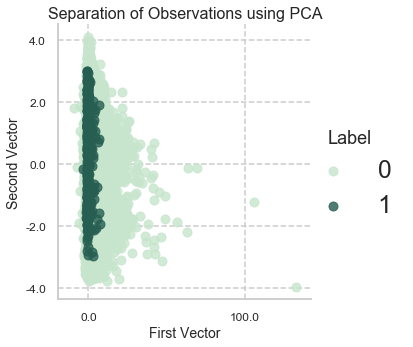

In [280]:
# 30 principal components
from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten,
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

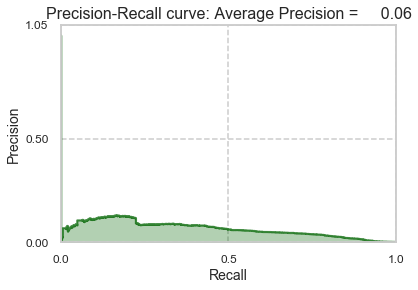

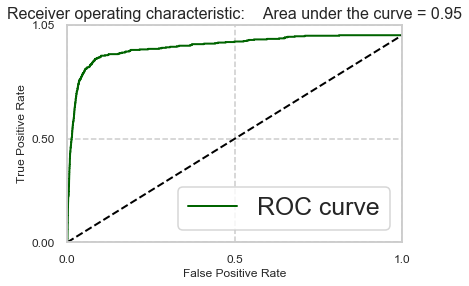

In [282]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [283]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 400
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop.
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. 
            anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print("Fraud Caught out of 394 Cases:", predsTop.trueLabel.sum())



Precision:  0.12
Recall:  0.12
Fraud Caught out of 394 Cases: 48


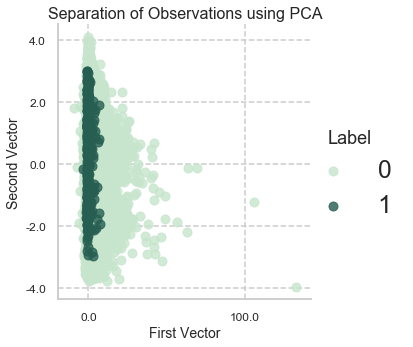

In [284]:
# 27 principal components
from sklearn.decomposition import PCA

n_components = 27
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, 
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse,
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

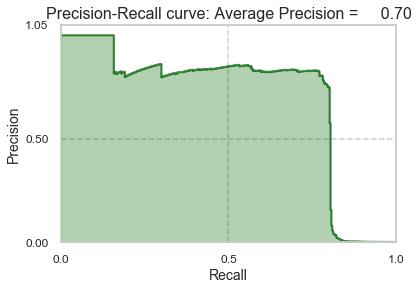

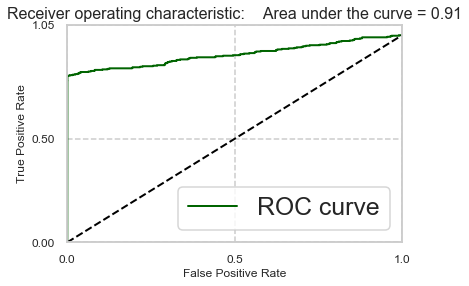

In [286]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [287]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 400
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))

Precision:  0.78
Recall:  0.79


## PCA manual confusion matrix


In [288]:
np.array(preds).shape

(227845, 2)

In [289]:
print(type(preds))

<class 'pandas.core.frame.DataFrame'>


+ going to state threshold for anomaly score is 0.02000 and higher is considered a fraud

In [290]:
preds[:10]

,trueLabel,anomalyScore
154684,1,1.000000
151007,1,0.926889
151008,1,0.926889
151006,1,0.926889
151009,1,0.926889
154234,1,0.921859
153823,1,0.887030
153835,1,0.886669
152295,1,0.857126
151462,1,0.855525


In [291]:
preds['predicted_class'] = np.where(preds.anomalyScore>0.02200 , 1, 0)

In [292]:
preds.head(10)

,trueLabel,anomalyScore,predicted_class
154684,1,1.000000,1
151007,1,0.926889,1
151008,1,0.926889,1
151006,1,0.926889,1
151009,1,0.926889,1
154234,1,0.921859,1
153823,1,0.887030,1
153835,1,0.886669,1
152295,1,0.857126,1
151462,1,0.855525,1


In [293]:
(preds > 0).sum()

trueLabel             394
anomalyScore       227844
predicted_class       391
dtype: int64

In [294]:
(preds < 0).sum()

trueLabel          0
anomalyScore       0
predicted_class    0
dtype: int64

In [295]:
matrix = np.array(preds)
matrix

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.26889024e-01, 1.00000000e+00],
       [1.00000000e+00, 9.26889024e-01, 1.00000000e+00],
       ...,
       [0.00000000e+00, 3.45981964e-09, 0.00000000e+00],
       [0.00000000e+00, 2.17249284e-09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [371]:
# function for counts of instance predicted positive and negative asn well as actual positive and negative
matrix = np.array(preds)

def make_input_matrix(arr):
    predict_positive = 0  
    predict_negative = 0 
    actual_positive = 0  
    actual_negative = 0

    for i in arr[:, 2]:
        if i == 1:   
            predict_positive+=1
        else:
            predict_negative +=1
    for i in arr[:, 0]:
        if i == 1:   
            actual_positive+=1
        else:
            actual_negative +=1

    return predict_positive, predict_negative, actual_positive, actual_negative

In [297]:
make_input_matrix(matrix)

(391, 227454, 394, 227451)

In [298]:
item = make_input_matrix(matrix)
item

(391, 227454, 394, 227451)

In [372]:
#function for making confusion matrix in LOGICAL format

def make_conf_matrix(item):   
    true_positive = 0
    true_negative = 0

    false_negative = 0
    false_positive = 0
    
    predict_positive = item[0]
    predict_negative = item[1]
    actual_positive = item[2]
    actual_negative = item[3]
    
    
    num = actual_positive - predict_positive
    num2 = actual_negative - predict_negative

    if actual_positive - predict_positive > 1:

        false_negative += num
    else:
        false_positive -= num

    if actual_positive > predict_positive:
        true_positive += predict_positive
    else:
        true_positive += actual_positive

    if actual_negative > predict_negative:
        true_negative += predict_negative
    else:
        true_negative += actual_negative
    return true_positive, false_negative, false_positive, true_negative 
# print(false_negative, false_positive, true_negative, true_positive)

In [361]:
make_conf_matrix(item)

(391, 3, 0, 227451)

In [362]:
conf_matrix = make_conf_matrix(make_input_matrix(matrix))
array_conf_matrix = np.asarray(conf_matrix)
array_conf_matrix

array([   391,      3,      0, 227451])

In [363]:
y_hat_matrix = np.array(preds)[:, 2]
y_hat_matrix

array([1., 1., 1., ..., 0., 0., 0.])

In [364]:
y_og_matrix = np.array(preds)[:, 0]
y_og_matrix

array([1., 1., 1., ..., 0., 0., 0.])

In [304]:
y_og_matrix.sum()

394.0

In [305]:
y_hat_matrix.sum()

391.0

In [394]:
y_og_matrix.shape

(227845,)

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    227451
        1.0       0.79      0.78      0.78       394

avg / total       1.00      1.00      1.00    227845

AUC:  89.1%


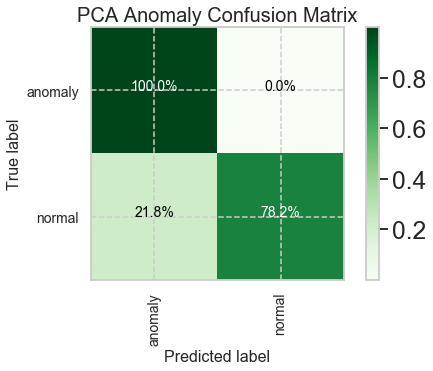

In [391]:
#CONFUSION MATRIX FOR PCA ANALYSIS
import seaborn as sns

print(classification_report(y_og_matrix, y_hat_matrix))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_og_matrix, y_hat_matrix)))
cm = confusion_matrix(y_og_matrix, y_hat_matrix)
plot_confusion_matrix(cm, title="PCA Anomaly Confusion Matrix", save=False, saveas="PCA_Confusion.png")

# NN Auto-encoder

In [307]:
from functools import reduce
from operator import mul
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Flatten, Conv2D, MaxPooling2D, Dropout, Reshape, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax, Ftrl, Nadam, Optimizer, Adadelta, Adagrad, RMSprop, SGD


In [308]:
#import csv data newly so any modifications are not transferred
df = pd.read_csv('creditcard.csv')

In [309]:
#create x and y, maintain in dataframe/ series format for the following
X_nn = df.copy().drop('Class', axis=1)
y_nn = df['Class'].copy()

# Need to scale the X features that are still in dataframe format
featuresToScale = X_nn.columns

#use Standard scaler to modify all of the feature columns in X
scaled_X_nn = StandardScaler(copy=True)

# replace all of X_pca DataFrame features with the scaled features
# also fit label encoder and return encoded labels
# once you fit_transform to you X feature data 
X_nn.loc[:,featuresToScale] = scaled_X_nn.fit_transform(X_nn[featuresToScale])

In [310]:
def dense_encoder(shape, neurons, dim):
    i = Input(shape=shape)
    x = Flatten()(i)
    x = Dense(units=neurons)(x)
    x = LeakyReLU()(x)
    x = Dense(units=dim)(x)
    x = LeakyReLU()(x)
    return Model(i, x, name='Dense-Encocder')

In [311]:
def dense_decoder(shape, neurons, dim):
    flattened = reduce(mul, shape)
    i = Input(shape=dim)
    x = Dense(units=neurons)(i)
    x = LeakyReLU()(x)
    x = Dense(units=flattened)(x)
    x = LeakyReLU()(x)
    x = Reshape(shape)(x)
    return Model(i, x, name='Dense-Decoder')

In [312]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [313]:
X_nn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [314]:
Xnn_train, Xnn_test, ynn_train, ynn_test = train_test_split(X_nn, y_nn, test_size=0.2,
                    random_state=42, stratify=y_nn)

In [315]:
Xnn_train.shape, ynn_train.shape

((227845, 30), (227845,))

In [395]:
# dimension reduction
dim = 27

In [396]:
Xnn_train.shape[1:]

(30,)

In [397]:
# ENCODER
encoder = dense_encoder(Xnn_train.shape[1:], 300, dim)
encoder.summary()

Model: "Dense-Encocder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 30)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 300)               9300      
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 300)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 27)                8127      
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 27)                0         
Total params: 17,427
Trainable params: 17,427
Non-trainable params: 0
________________________________________________

In [398]:

# DECODER
decoder = dense_decoder(Xnn_train.shape[1:], 300, dim)
decoder.summary()

Model: "Dense-Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 27)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 300)               8400      
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 300)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 30)                9030      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 30)                0         
_________________________________________________________________
reshape_11 (Reshape)         (None, 30)                0         
Total params: 17,430
Trainable params: 17,430
Non-trainable params: 0
_________________________________________________

In [399]:

# AUTOENCODER
inp = Input(shape=Xnn_train.shape[1:])
mid = encoder(inp)
out = decoder(mid)

model = Model(inp, out, name="Dense-AutoEncoder")
model.summary()

Model: "Dense-AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
Dense-Encocder (Model)       (None, 27)                17427     
_________________________________________________________________
Dense-Decoder (Model)        (None, 30)                17430     
Total params: 34,857
Trainable params: 34,857
Non-trainable params: 0
_________________________________________________________________


In [400]:

# TRAINING
model.compile(loss="mse", optimizer=Adam(lr=0.005))
model.fit(Xnn_train, Xnn_train, epochs=20, batch_size=400, shuffle=True, validation_data=(Xnn_test, Xnn_test), verbose=1)

Train on 227845 samples, validate on 56962 samples
Epoch 1/20
227845/227845 [==============================] - 3s 13us/sample - loss: 0.1346 - val_loss: 0.0584
Epoch 2/20
227845/227845 [==============================] - 2s 11us/sample - loss: 0.0634 - val_loss: 0.0281
Epoch 3/20
227845/227845 [==============================] - 2s 11us/sample - loss: 0.0390 - val_loss: 0.0264
Epoch 4/20
227845/227845 [==============================] - 2s 11us/sample - loss: 0.0263 - val_loss: 0.0180
Epoch 5/20
227845/227845 [==============================] - 3s 11us/sample - loss: 0.0250 - val_loss: 0.0510
Epoch 6/20
227845/227845 [==============================] - 3s 11us/sample - loss: 0.0327 - val_loss: 0.0270
Epoch 7/20
227845/227845 [==============================] - 2s 11us/sample - loss: 0.0240 - val_loss: 0.0454
Epoch 8/20
227845/227845 [==============================] - 2s 11us/sample - loss: 0.0206 - val_loss: 0.0093
Epoch 9/20
227845/227845 [==============================] - 3s 11us/sample - 

In [401]:

# PREDICTIONS
Xnn_hat = model.predict(Xnn_train)

In [402]:
Xnn_hat.shape, Xnn_train.shape

((227845, 30), (227845, 30))

## Analyze results of NN encoding

In [403]:
ynn_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [405]:
X_train_NN = Xnn_train
X_train_NN = pd.DataFrame(data=X_train_NN, index=Xnn_train.index)

X_hat_NN = Xnn_hat
X_hat_NN = pd.DataFrame(data=X_hat_NN, index=Xnn_train.index)

In [406]:
X_train_NN.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.413095,0.993901,-0.455716,-0.893736,-0.467297,1.088809,3.021112,-1.196081,0.954393,1.280521,...,-0.174381,0.103736,0.409999,0.493090,1.140898,-0.672034,-0.806483,0.192356,-0.097696,-0.323963
180305,0.624644,1.039035,-0.029601,-2.017272,0.175119,2.132584,2.476000,-0.001772,0.564978,0.041712,...,-0.294814,0.052590,0.314451,0.056917,1.167497,0.983900,-0.977130,0.006243,-0.209044,-0.341275
42664,-1.129186,-0.506419,0.365282,0.469563,-0.700931,-0.598327,1.468368,-1.788553,-4.217792,0.000702,...,1.661457,-3.809756,0.150924,-0.699053,-1.540179,1.585882,1.894906,0.094266,0.561497,0.346835
198723,0.796203,1.166961,-0.908517,-0.493035,-1.178161,-1.010069,-0.262964,-1.154307,0.008381,-1.018038,...,-0.636433,-0.190151,0.106123,0.333585,-0.888698,-0.533367,-0.336083,0.044707,-0.190877,-0.328841
82325,-0.746606,-0.229105,-0.612509,0.076440,-2.440100,0.518582,-0.110706,0.407688,-0.095296,-0.040762,...,-0.357100,-0.331161,-0.238802,-0.010717,-2.249471,-0.560612,-0.299904,-0.080718,-0.194477,-0.008994


In [407]:
X_hat_NN.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
265518,1.366506,0.977602,-0.479085,-0.936717,-0.462282,1.100174,3.017325,-1.232326,0.914018,1.298541,...,-0.103866,0.130299,0.407842,0.488002,1.130606,-0.690456,-0.830496,0.157051,-0.046759,-0.271110
180305,0.636107,0.976243,-0.072285,-2.012910,0.152136,2.110386,2.405823,-0.059209,0.537012,0.051045,...,-0.268772,0.039206,0.288806,0.063560,1.137918,0.993718,-0.961655,-0.028696,-0.110159,-0.311033
42664,-1.169554,-0.527624,0.392385,0.188912,-0.733876,-0.735912,1.412778,-1.872203,-4.280189,-0.030757,...,1.542009,-3.779014,0.321765,-0.546779,-1.525904,1.646888,1.928430,0.269395,0.849453,0.216780
198723,0.804507,1.165511,-0.896687,-0.489814,-1.208405,-1.003619,-0.307840,-1.160151,-0.002503,-1.055306,...,-0.636642,-0.174074,0.092240,0.435268,-0.903911,-0.555843,-0.317898,0.033096,-0.162343,-0.322887
82325,-0.750087,-0.273773,-0.590432,-0.022874,-2.413883,0.457621,-0.263487,0.207344,-0.125391,-0.090929,...,-0.448515,-0.317243,-0.250640,0.152305,-2.300060,-0.521734,-0.300237,-0.012530,-0.124592,-0.040432


In [408]:
def anomalyScoresNN(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [409]:
anomalyScoresNN = anomalyScores(Xnn_train, X_hat_NN)
anomalyScoresNN = pd.DataFrame(data=anomalyScoresNN, index=Xnn_train.index)

anomalyScoresNN 

,0
265518,0.000064
180305,0.000052
42664,0.000686
198723,0.000058
82325,0.000295
...,...
233802,0.000028
85418,0.000112
29062,0.000049
13766,0.000084


In [410]:
preds_NN = pd.concat([ynn_train, anomalyScoresNN], axis=1)
preds_NN.columns = ['trueLabel', 'anomalyScoreNN']
preds_NN.trueLabel.value_counts()


0    227451
1       394
Name: trueLabel, dtype: int64

In [419]:
preds_NN.sort_values(by="anomalyScoreNN",ascending=False,inplace=True)
preds_NN[:50]

,trueLabel,anomalyScoreNN,predicted_class
274771,0,1.000000,1
39769,0,0.425780,1
262843,0,0.180597,1
220212,0,0.179202,1
219640,0,0.165698,1
224569,0,0.160786,1
201869,0,0.158179,1
206228,0,0.142992,1
206255,0,0.137223,1
262378,0,0.132502,1


In [446]:
preds_NN['predicted_class'] = np.where(preds_NN.anomalyScoreNN>0.0135 , 1, 0)
preds_NN[:50]

,trueLabel,anomalyScoreNN,predicted_class
274771,0,1.000000,1
39769,0,0.425780,1
262843,0,0.180597,1
220212,0,0.179202,1
219640,0,0.165698,1
224569,0,0.160786,1
201869,0,0.158179,1
206228,0,0.142992,1
206255,0,0.137223,1
262378,0,0.132502,1


In [447]:
(preds_NN > 0).sum()

trueLabel             394
anomalyScoreNN     227844
predicted_class       398
dtype: int64

In [448]:
(preds_NN < 0).sum()

trueLabel          0
anomalyScoreNN     0
predicted_class    0
dtype: int64

In [449]:
matrix_NN = np.array(preds_NN)
matrix_NN

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.25780485e-01, 1.00000000e+00],
       [0.00000000e+00, 1.80596638e-01, 1.00000000e+00],
       ...,
       [0.00000000e+00, 2.35869251e-07, 0.00000000e+00],
       [0.00000000e+00, 4.52294949e-08, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [450]:
item_NN = make_input_matrix(matrix_NN)
item_NN

(398, 227447, 394, 227451)

In [451]:
conf_matrix_NN = make_conf_matrix(make_input_matrix(matrix_NN))
array_conf_matrix_NN = np.asarray(conf_matrix_NN)
array_conf_matrix_NN

array([   394,      0,      4, 227447])

In [452]:
ynn_hat_matrix = np.array(preds_NN)[:, 2]
ynn_hat_matrix

array([1., 1., 1., ..., 0., 0., 0.])

In [453]:
ynn_og_matrix = np.array(preds)[:, 0]
ynn_og_matrix

array([1., 1., 1., ..., 0., 0., 0.])

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    227451
        1.0       0.78      0.78      0.78       394

avg / total       1.00      1.00      1.00    227845

AUC:  89.2%


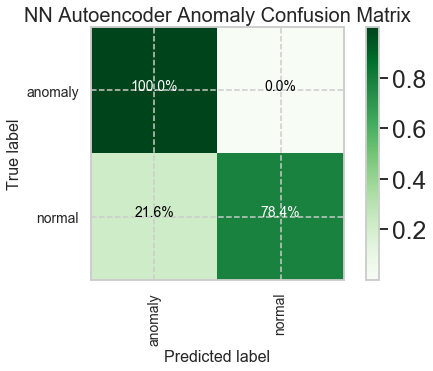

In [454]:
#CONFUSION MATRIX FOR PCA ANALYSIS
import seaborn as sns

print(classification_report(ynn_og_matrix, ynn_hat_matrix))
print ("AUC: ", "{:.1%}".format(roc_auc_score(ynn_og_matrix, ynn_hat_matrix)))
cm = confusion_matrix(ynn_og_matrix, ynn_hat_matrix)
plot_confusion_matrix(cm, title="NN Autoencoder Anomaly Confusion Matrix", save=False, saveas="NN_Confusion.png")